DATA PREPROCESSING

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [40]:
print(df.head(10))

   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   
5     148462   24       1          1        173                0   
6     168686   79       1          2        130              240   
7     170498   52       1          0        127              345   
8     188225   62       1          0        121              357   
9     192523   61       0          0        190              181   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2             

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [42]:
df.isnull().any()

patientid            False
age                  False
gender               False
chestpain            False
restingBP            False
serumcholestrol      False
fastingbloodsugar    False
restingrelectro      False
maxheartrate         False
exerciseangia        False
oldpeak              False
slope                False
noofmajorvessels     False
target               False
dtype: bool

Removing Duplicate if any

In [43]:
df.shape

(1000, 14)

In [44]:
df = df.drop_duplicates()
df.shape

(1000, 14)

In [45]:
duplicates = df.duplicated(subset='patientid', keep=False)
duplicate_rows = df[duplicates]

if duplicate_rows.empty:
    print("All patient IDs are unique.")
else:
    print("There are duplicate patient IDs in the dataset.")
    print(duplicate_rows)

All patient IDs are unique.


Dropping Patientid column

In [46]:
df = df.drop(columns="patientid")

In [47]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

EDA

In [48]:
df.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [49]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

<Axes: >

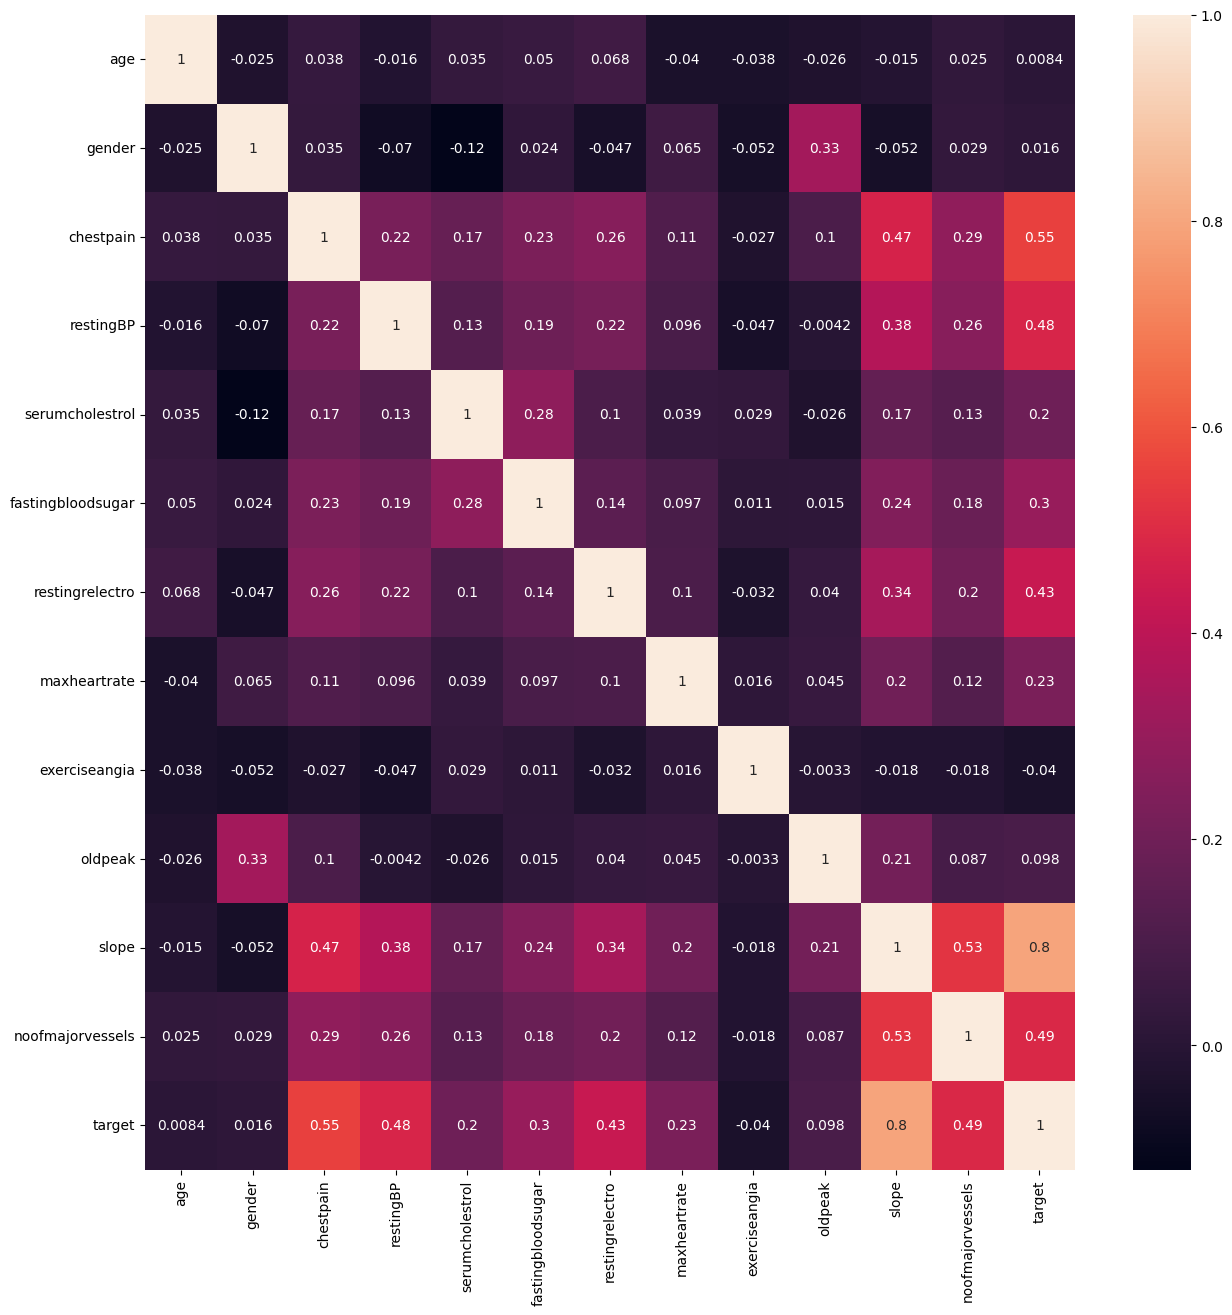

In [50]:
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot=True)

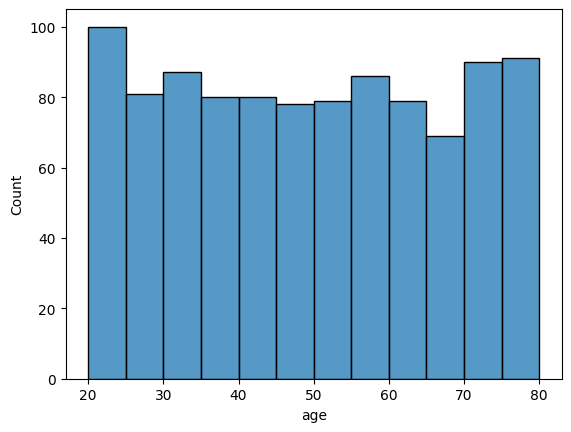

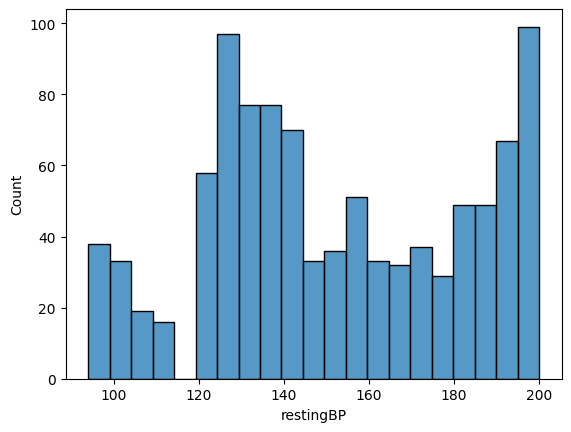

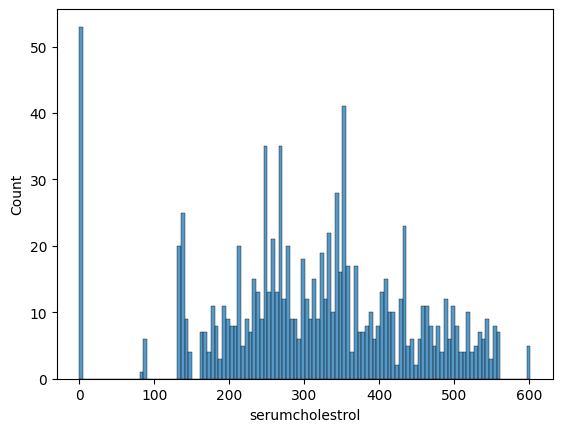

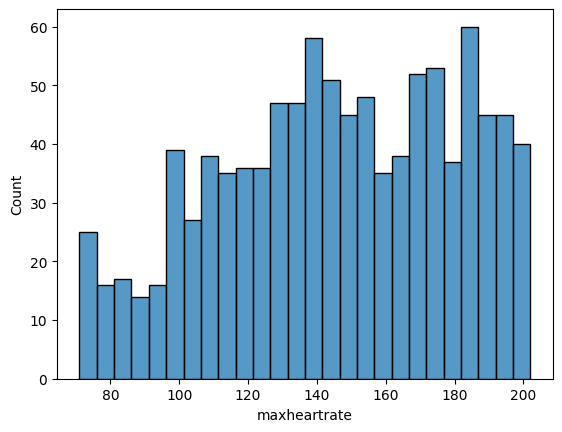

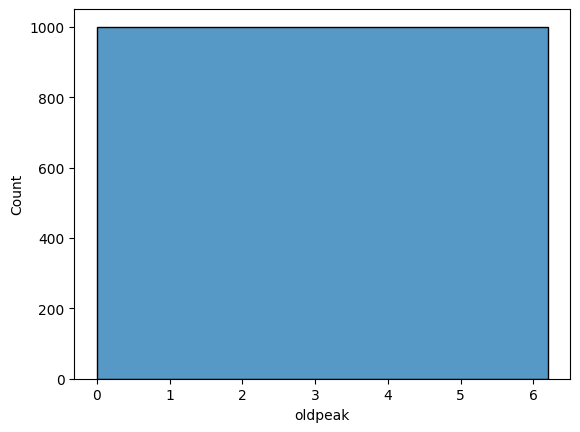

In [51]:
for i in ["age", "restingBP", "serumcholestrol", "maxheartrate","oldpeak"]:
    sns.histplot(data=df, x=df[i], binwidth=5)
    plt.show()


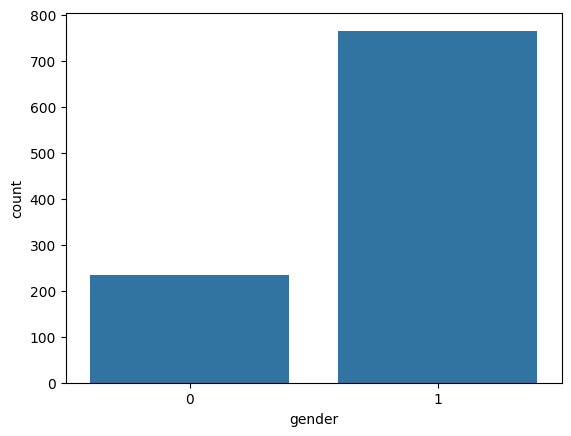

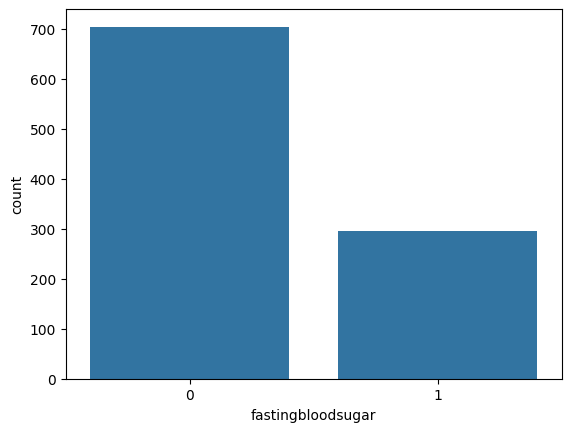

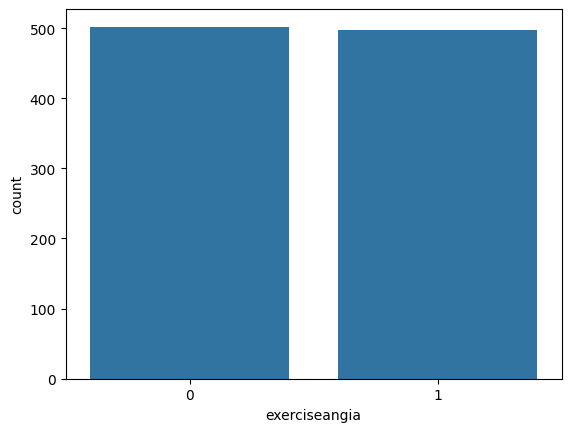

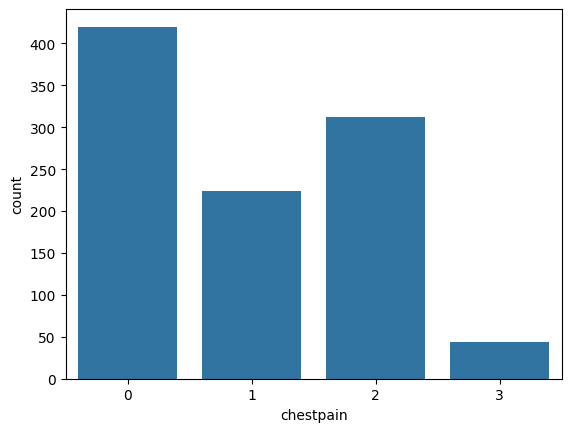

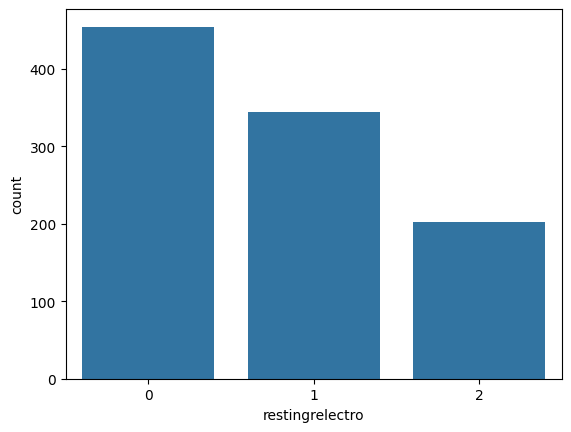

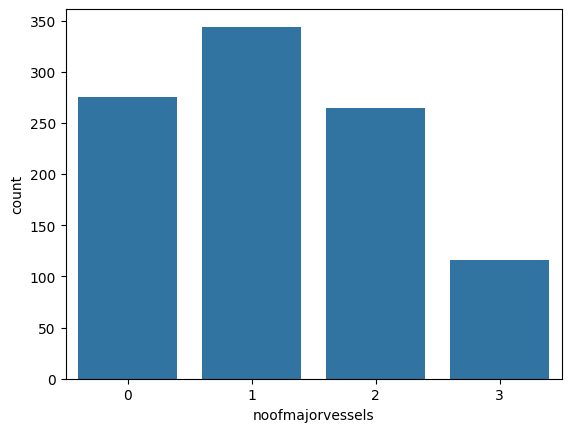

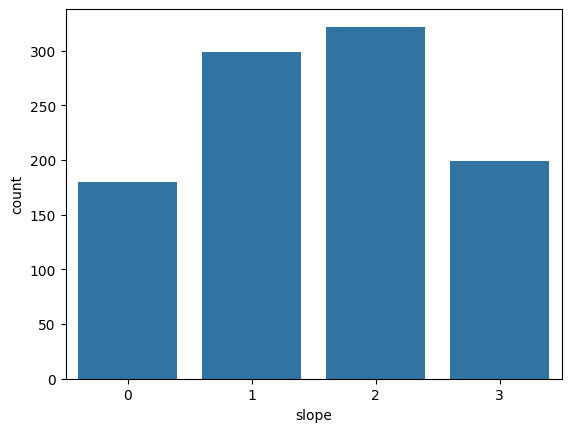

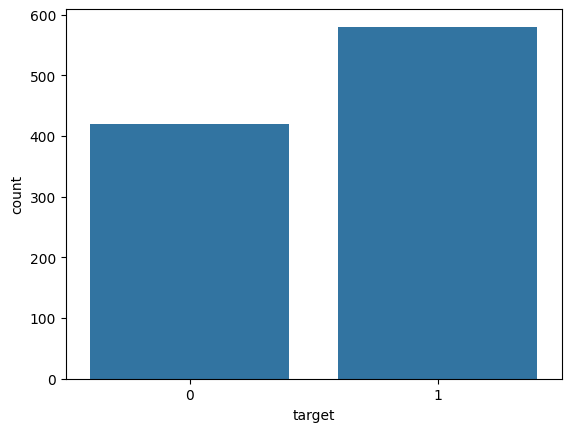

In [52]:
#for binary values
for i in ["gender",'fastingbloodsugar',"exerciseangia","chestpain", "restingrelectro", "noofmajorvessels","slope","target"]:
    sns.countplot(x=df[i], data=df)
    plt.show()

In [53]:
df.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels', 'target'],
      dtype='object')

Removing Noises

Outliers

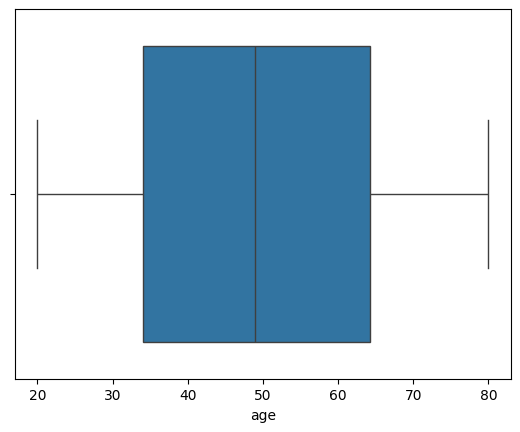

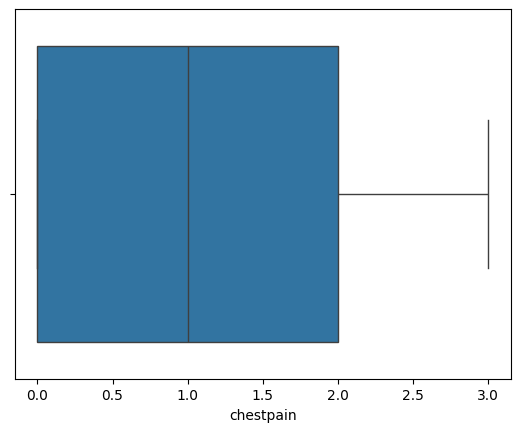

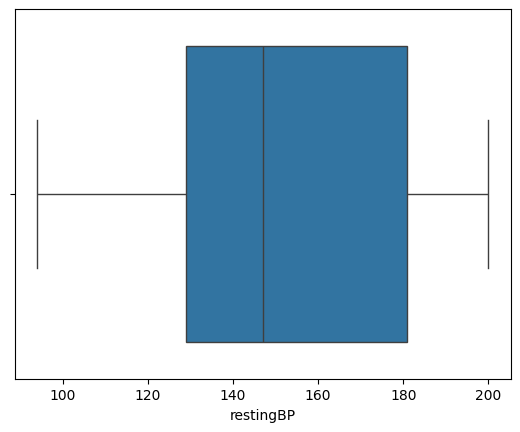

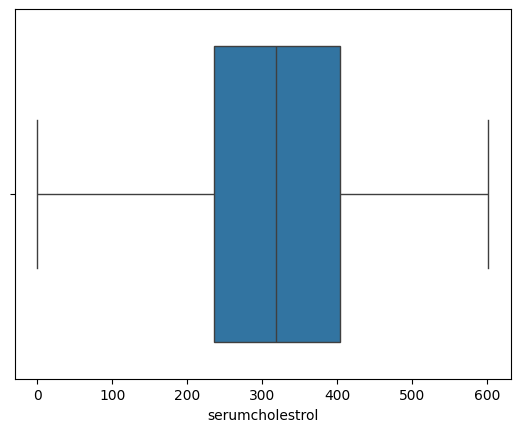

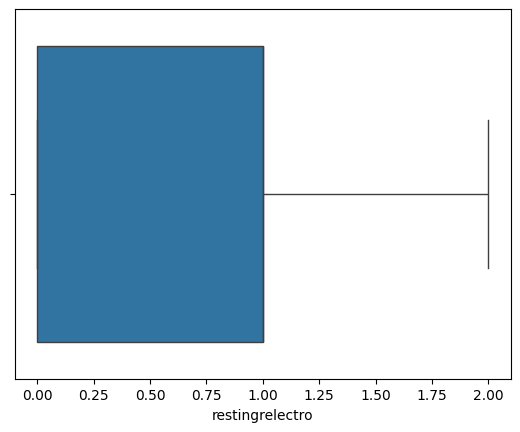

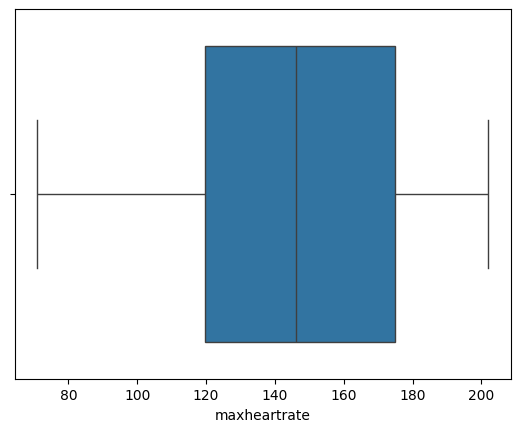

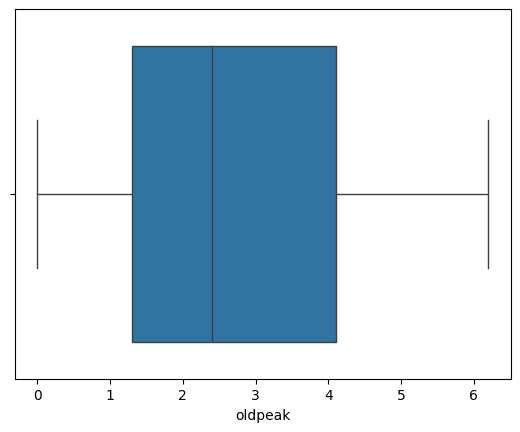

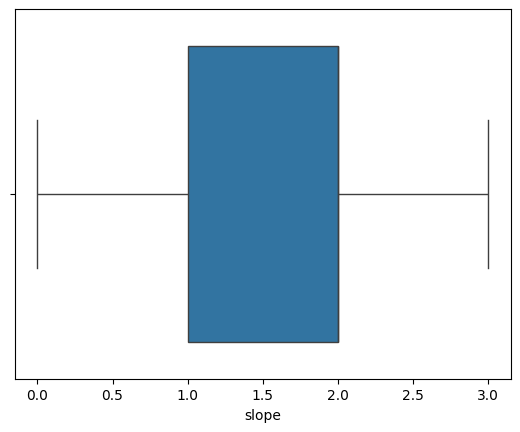

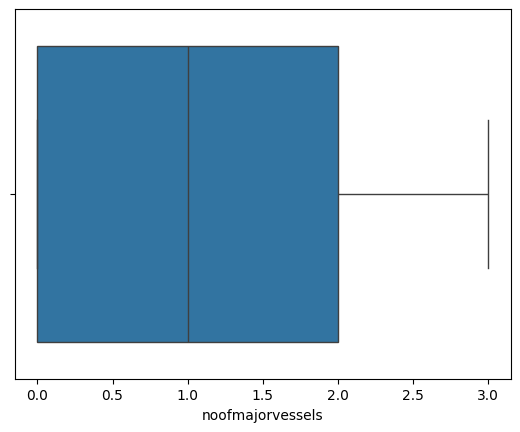

In [54]:
for i in ["age" ,"chestpain" ,"restingBP" ,"serumcholestrol","restingrelectro","maxheartrate","oldpeak","slope","noofmajorvessels"]:
    sns.boxplot(data = df,x = df[i])
    plt.show()

In [55]:
# Serum cholestrol can only have values ranging for 126 - 564 but some 0 values are present
# SINCE NO outliers present it can considered as noise and is df1 is used to make changes

df1 = df.copy()
zero_cholestrol_rows = df1[df1['serumcholestrol'] == 0]

zero_cholestrol_indexes = zero_cholestrol_rows.index

print("Rows with serumcholestrol value of 0:")
print(zero_cholestrol_rows)

df1['serumcholestrol'].replace(0, np.nan, inplace=True)

Rows with serumcholestrol value of 0:
     age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0     53       1          2        171                0                  0   
4     31       1          1        199                0                  0   
5     24       1          1        173                0                  0   
15    32       1          2        188                0                  0   
27    42       1          0        157                0                  0   
68    61       1          2        132                0                  0   
71    77       0          1        195                0                  0   
91    44       1          1        169                0                  0   
95    43       0          0        190                0                  0   
118   30       0          2         95                0                  0   
140   43       1          0        152                0                  0   
150   32       1          

C:\Users\ganes\AppData\Local\Temp\ipykernel_20264\4100660195.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['serumcholestrol'].replace(0, np.nan, inplace=True)


In [56]:

print("Rows count with serumcholestrol value of 0:")
print(zero_cholestrol_rows.count())

print("Rows with serumcholestrol value of 0:")
print(zero_cholestrol_rows)

Rows count with serumcholestrol value of 0:
age                  53
gender               53
chestpain            53
restingBP            53
serumcholestrol      53
fastingbloodsugar    53
restingrelectro      53
maxheartrate         53
exerciseangia        53
oldpeak              53
slope                53
noofmajorvessels     53
target               53
dtype: int64
Rows with serumcholestrol value of 0:
     age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0     53       1          2        171                0                  0   
4     31       1          1        199                0                  0   
5     24       1          1        173                0                  0   
15    32       1          2        188                0                  0   
27    42       1          0        157                0                  0   
68    61       1          2        132                0                  0   
71    77       0          1        195         

In [57]:
df1.isnull().sum()

age                   0
gender                0
chestpain             0
restingBP             0
serumcholestrol      53
fastingbloodsugar     0
restingrelectro       0
maxheartrate          0
exerciseangia         0
oldpeak               0
slope                 0
noofmajorvessels      0
target                0
dtype: int64

Handling Missing Data

In [58]:
# for knn imputation we are gonna use df1_1
df1 = df1.copy()

from sklearn.impute import KNNImputer

imputer = KNNImputer()

df1 = imputer.fit_transform(df1)

df1 = pd.DataFrame(df1, columns=df.columns)

print(df1.iloc[zero_cholestrol_indexes])

      age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0    53.0     1.0        2.0      171.0            334.2                0.0   
4    31.0     1.0        1.0      199.0            376.6                0.0   
5    24.0     1.0        1.0      173.0            323.0                0.0   
15   32.0     1.0        2.0      188.0            425.4                0.0   
27   42.0     1.0        0.0      157.0            326.2                0.0   
68   61.0     1.0        2.0      132.0            295.2                0.0   
71   77.0     0.0        1.0      195.0            302.8                0.0   
91   44.0     1.0        1.0      169.0            394.0                0.0   
95   43.0     0.0        0.0      190.0            396.8                0.0   
118  30.0     0.0        2.0       95.0            261.6                0.0   
140  43.0     1.0        0.0      152.0            444.6                0.0   
150  32.0     1.0        2.0      161.0            3

In [59]:
df1.isnull().sum()

age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [60]:
x = df.corr()

In [61]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
fastingbloodsugar    0.303233
maxheartrate         0.228343
serumcholestrol      0.195340
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64

In [62]:
x= df1.corr()

In [63]:
target_column = "target"
sorted_corr = x[target_column].sort_values(ascending=False)
sorted_corr

target               1.000000
slope                0.797358
chestpain            0.554228
noofmajorvessels     0.489866
restingBP            0.482387
restingrelectro      0.426837
serumcholestrol      0.374824
fastingbloodsugar    0.303233
maxheartrate         0.228343
oldpeak              0.098053
gender               0.015769
age                  0.008356
exerciseangia       -0.039874
Name: target, dtype: float64

In [64]:
# from this we can see that the exerciseangia has the lowest correlation with heart diesease
# Hence can be dropped if necessary

# KNN

0.9937530386132333
[[ 78   5]
 [  5 112]]


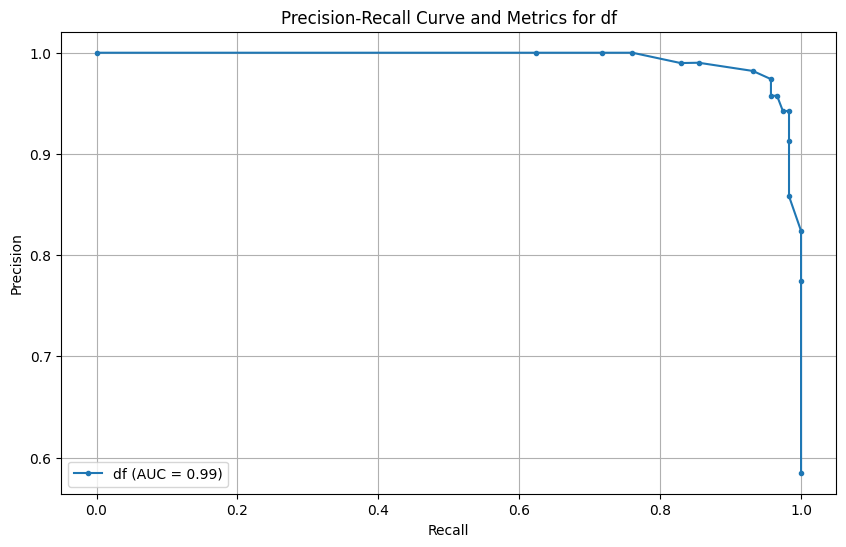

Accuracy for df: 0.95
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        83
         1.0       0.96      0.96      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



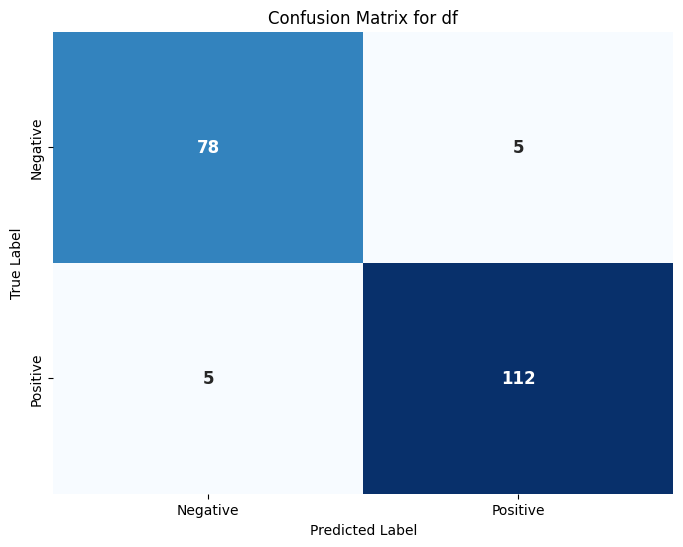

0.9937530386132333
[[ 78   5]
 [  5 112]]


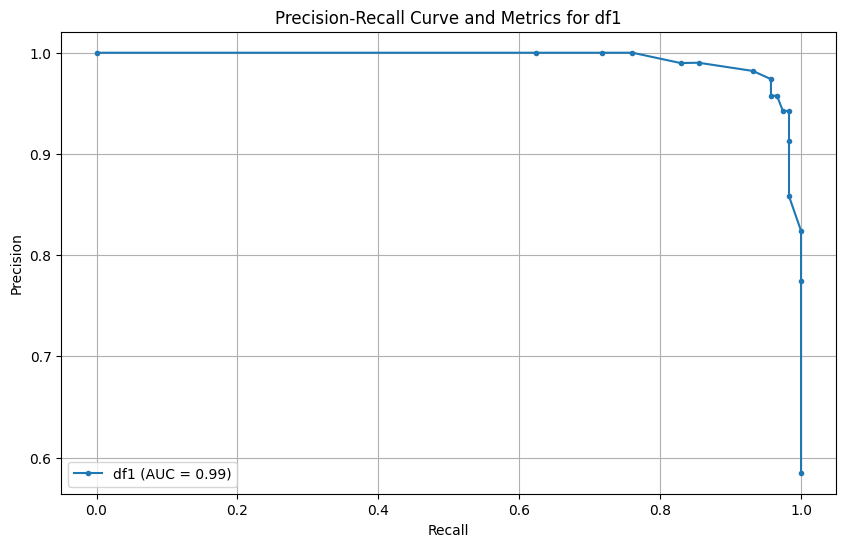

Accuracy for df1: 0.95
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        83
         1.0       0.96      0.96      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



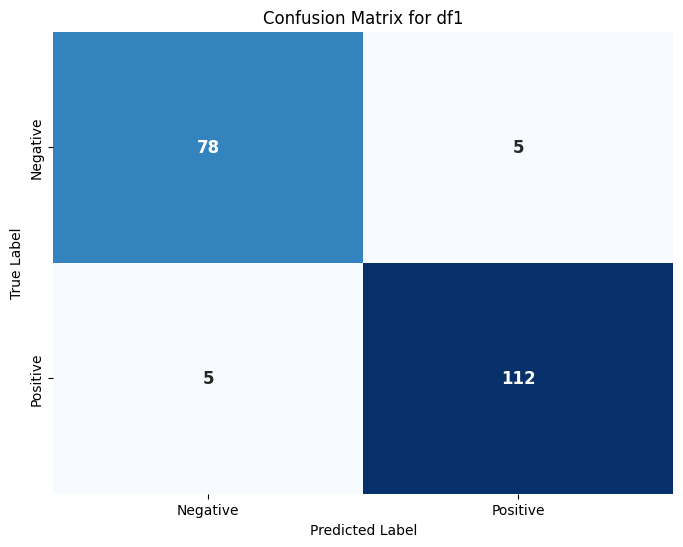

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to perform KNN with scaling, plot PR curve, calculate AUC, accuracy, classification report, and confusion matrix
def knn_pr_curve_and_report(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=15)

    # Fit the classifier on the scaled training data
    knn.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = knn.predict_proba(X_test_scaled)[:, 1]

    # Calculate precision and recall values
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(pr_auc)

    # Calculate accuracy
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'{dataset_label} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve and Metrics for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)
    
    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

# Iterate through each dataset, perform KNN classification with scaling, plot PR curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    knn_pr_curve_and_report(X, y, label)


# Logistic Regression

In [66]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, classification_report

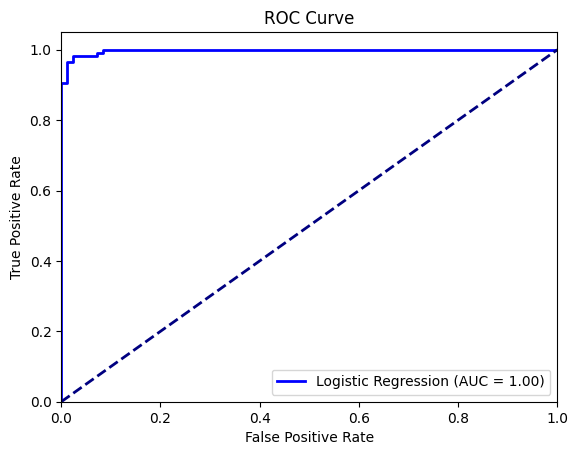

Accuracy: 0.9700
Precision: 0.9664
Recall: 0.9829
F1 Score: 0.9746
[[ 79   4]
 [  2 115]]
0.9240 (accuracy)


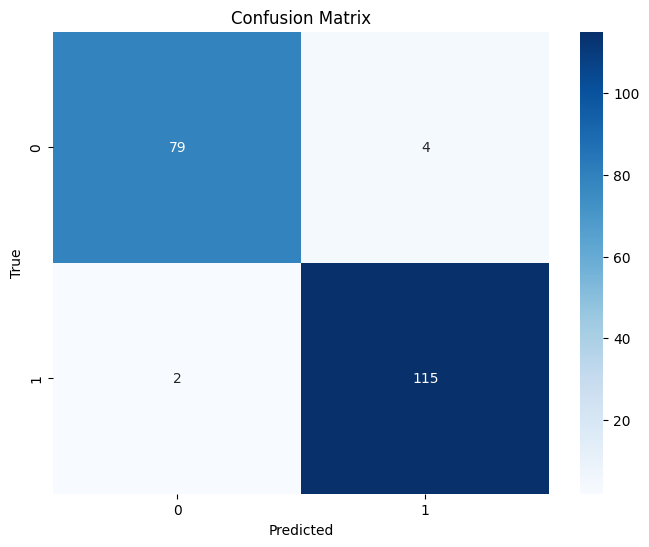

Total number of correct predictions = 194 out of 200


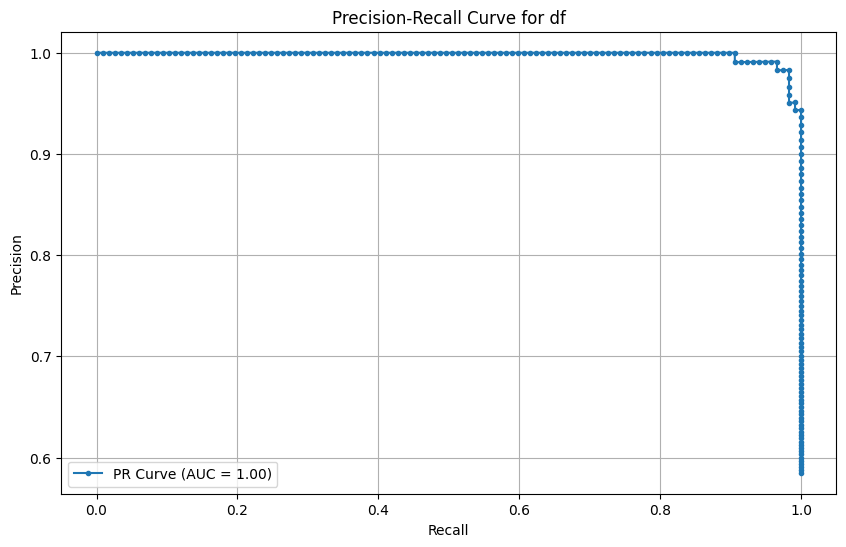

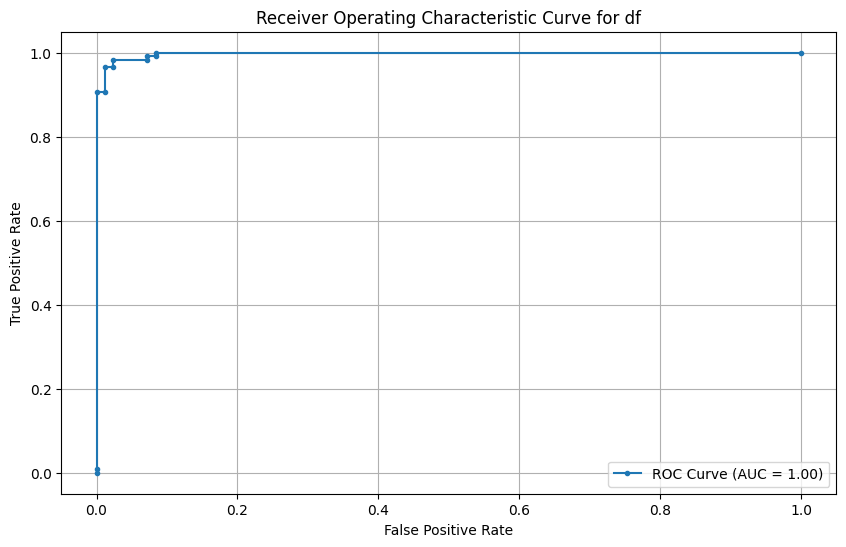

Accuracy for df: 0.97
Classification Report for df:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        83
         1.0       0.97      0.98      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



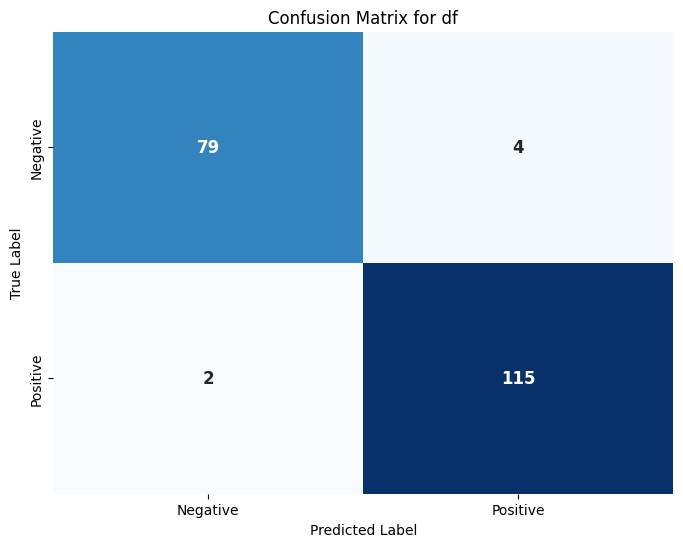

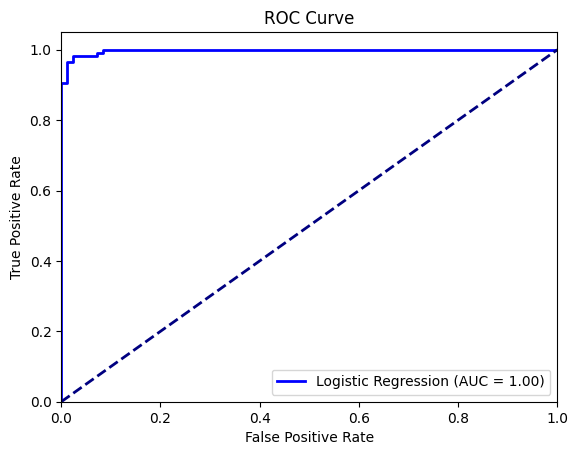

Accuracy: 0.9700
Precision: 0.9664
Recall: 0.9829
F1 Score: 0.9746
[[ 79   4]
 [  2 115]]
0.9240 (accuracy)


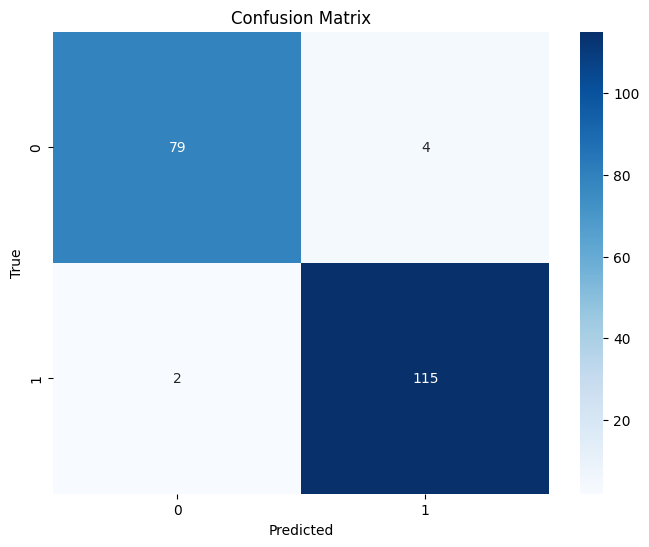

Total number of correct predictions = 194 out of 200


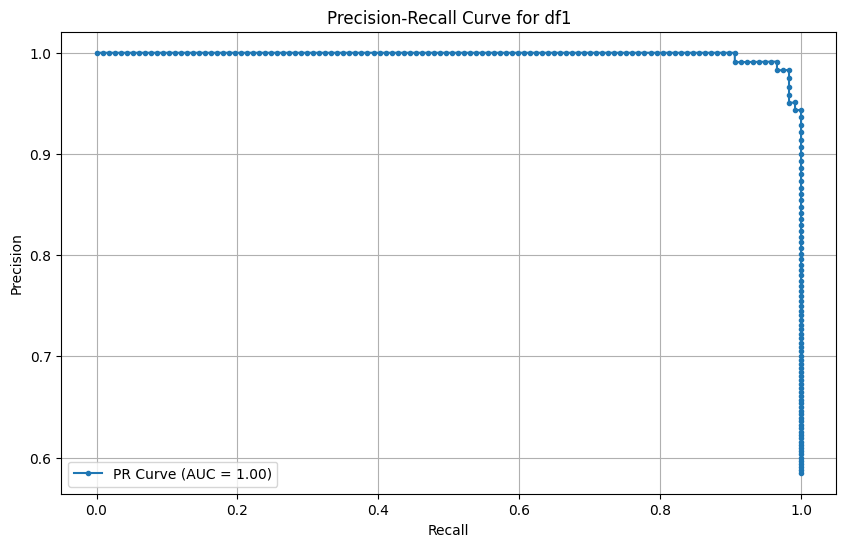

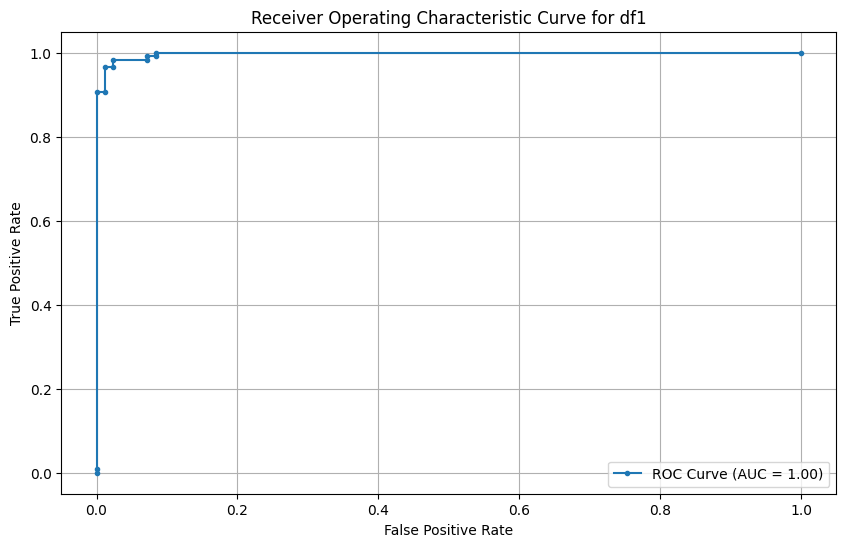

Accuracy for df1: 0.97
Classification Report for df1:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        83
         1.0       0.97      0.98      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



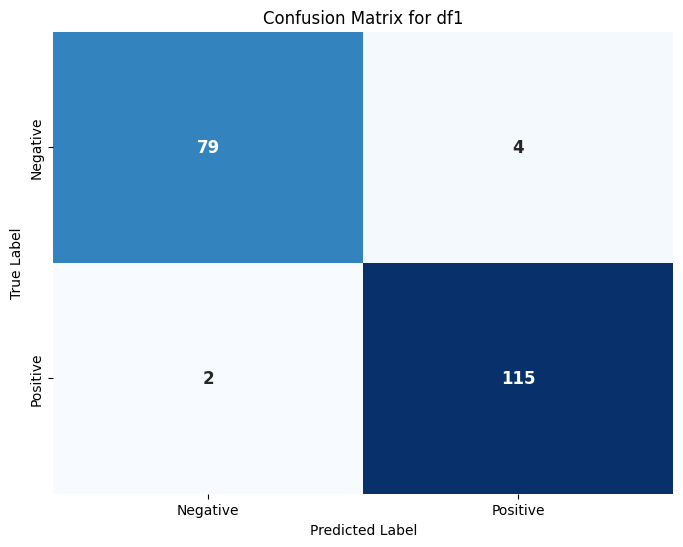

In [77]:
def logistic_regression(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the Logistic Regression model with increased max_iter and different solver
    logreg = LogisticRegression(random_state=42, max_iter=10000, solver='saga')
    logreg.fit(X_train, y_train)

    # Get the predicted probabilities
    y_score_logreg = logreg.predict_proba(X_test)[:, 1]

    # Predict the test set results
    y_pred = logreg.predict(X_test)

    # Compute ROC curve
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg, pos_label=1)

    # Plot ROC curve
    roc_auc_lg = auc(fpr_logreg, tpr_logreg)
    plt.figure()
    plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lg:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
    print(f"{scores.mean():.4f} (accuracy)")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Total number of correct predictions = {cm[0][0] + cm[1][1]} out of {y_test.shape[0]}")

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_score_logreg)
    pr_auc = auc(recall, precision)

    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_score_logreg)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)

    # Plot the PR curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_logreg, tpr_logreg, marker='.', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic Curve for {dataset_label}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print accuracy, classification report, and confusion matrix
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')
    print(f'Classification Report for {dataset_label}:')
    print(class_report)

    # Plot confusion matrix with labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"})
    plt.title(f'Confusion Matrix for {dataset_label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Negative', 'Positive'])  # Adjust y-axis labels
    plt.show()

# Example usage with datasets
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    logistic_regression(X, y, label)


# Decision Tree

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, classification_report, confusion_matrix, precision_recall_curve, make_scorer, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

Optimal parameters: {'criterion': 'entropy', 'max_depth': 8}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93        83
         1.0       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

PR AUC: 0.9678072502210433
Accuracy for df: 0.94


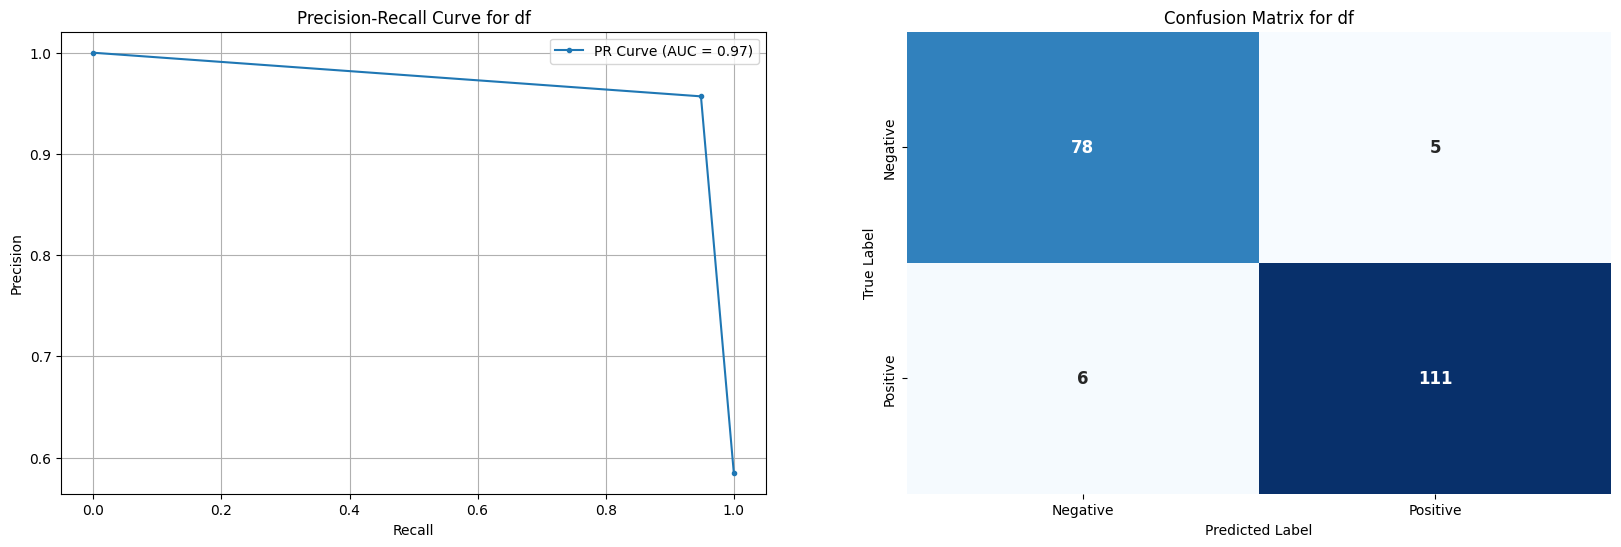

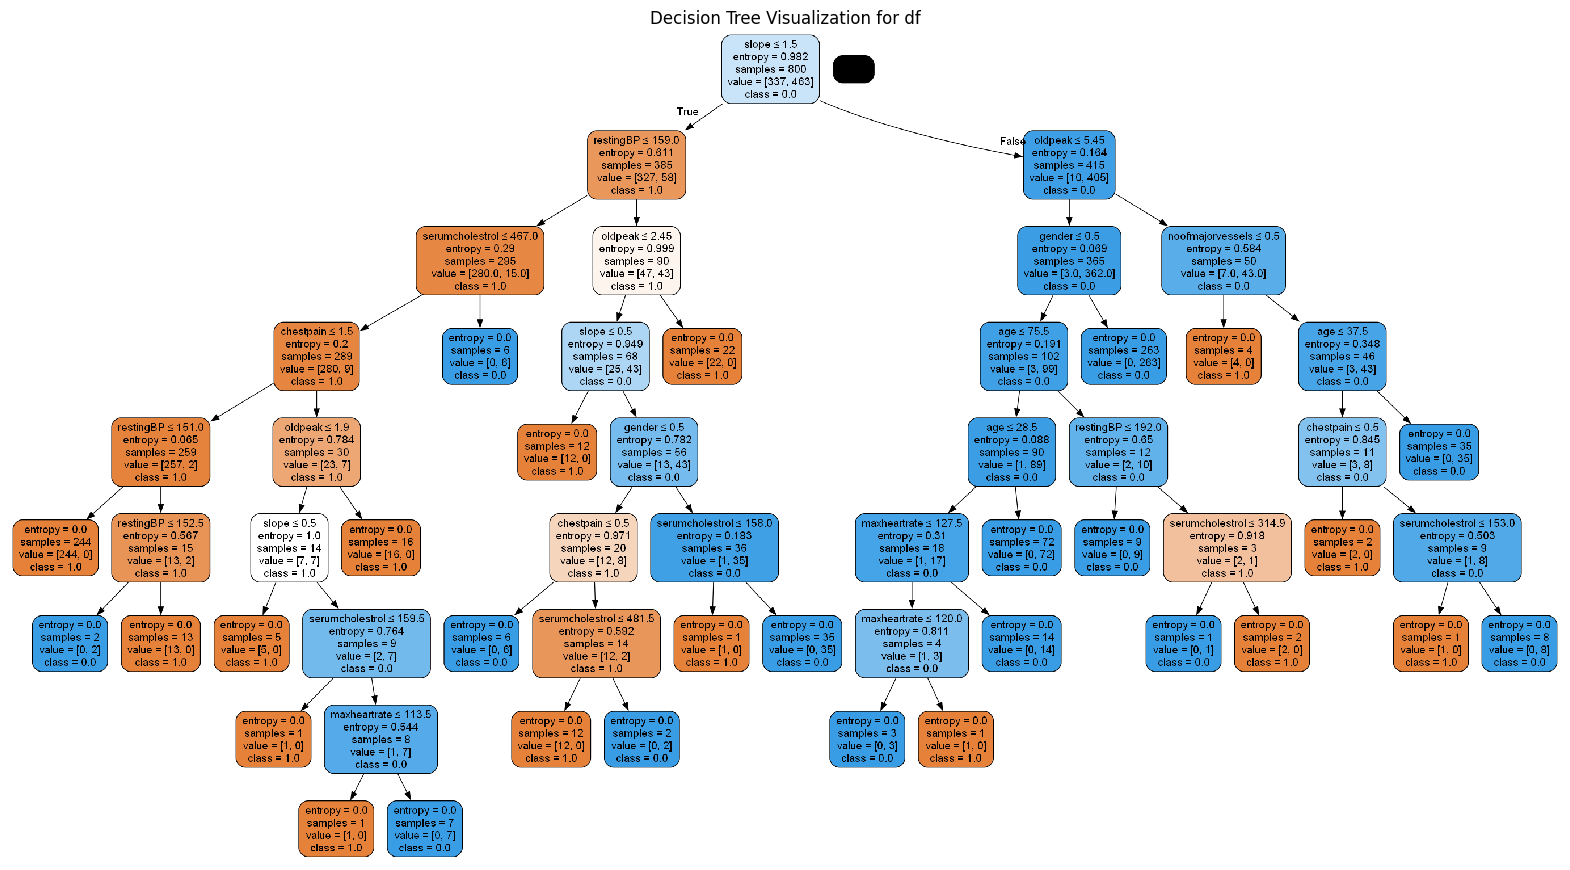

Optimal parameters: {'criterion': 'entropy', 'max_depth': 8}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93        83
         1.0       0.96      0.95      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

PR AUC: 0.9678072502210433
Accuracy for df1: 0.94


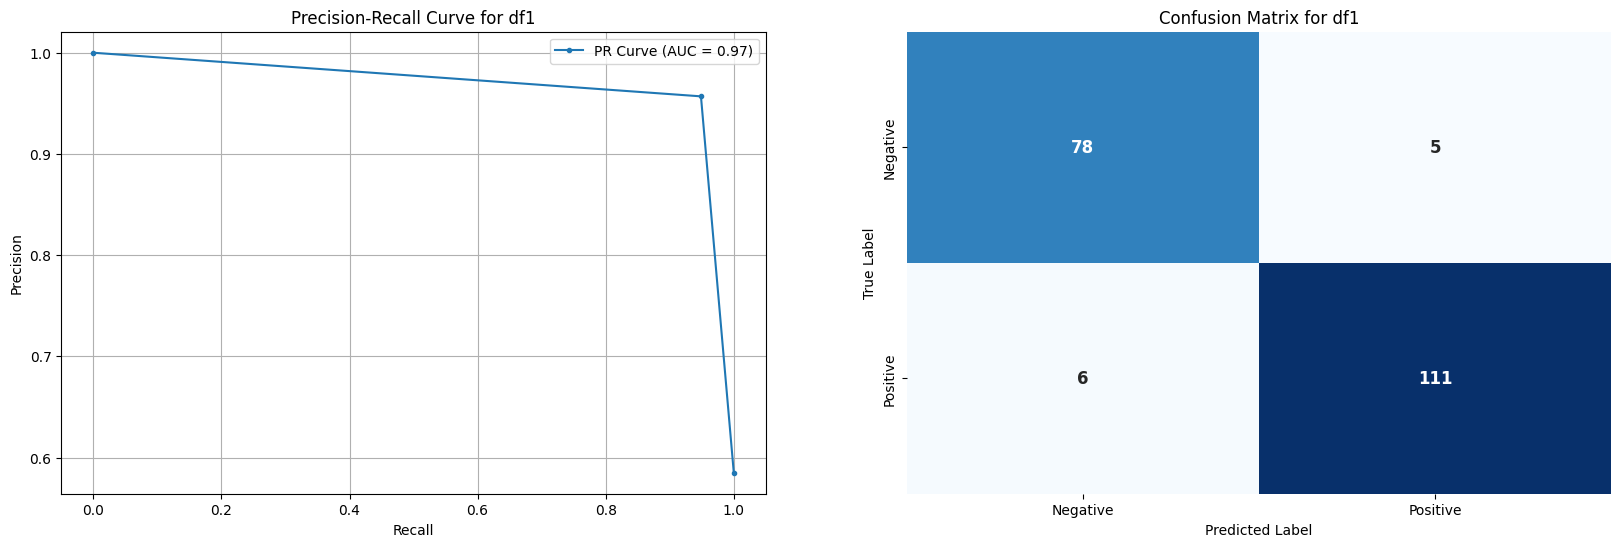

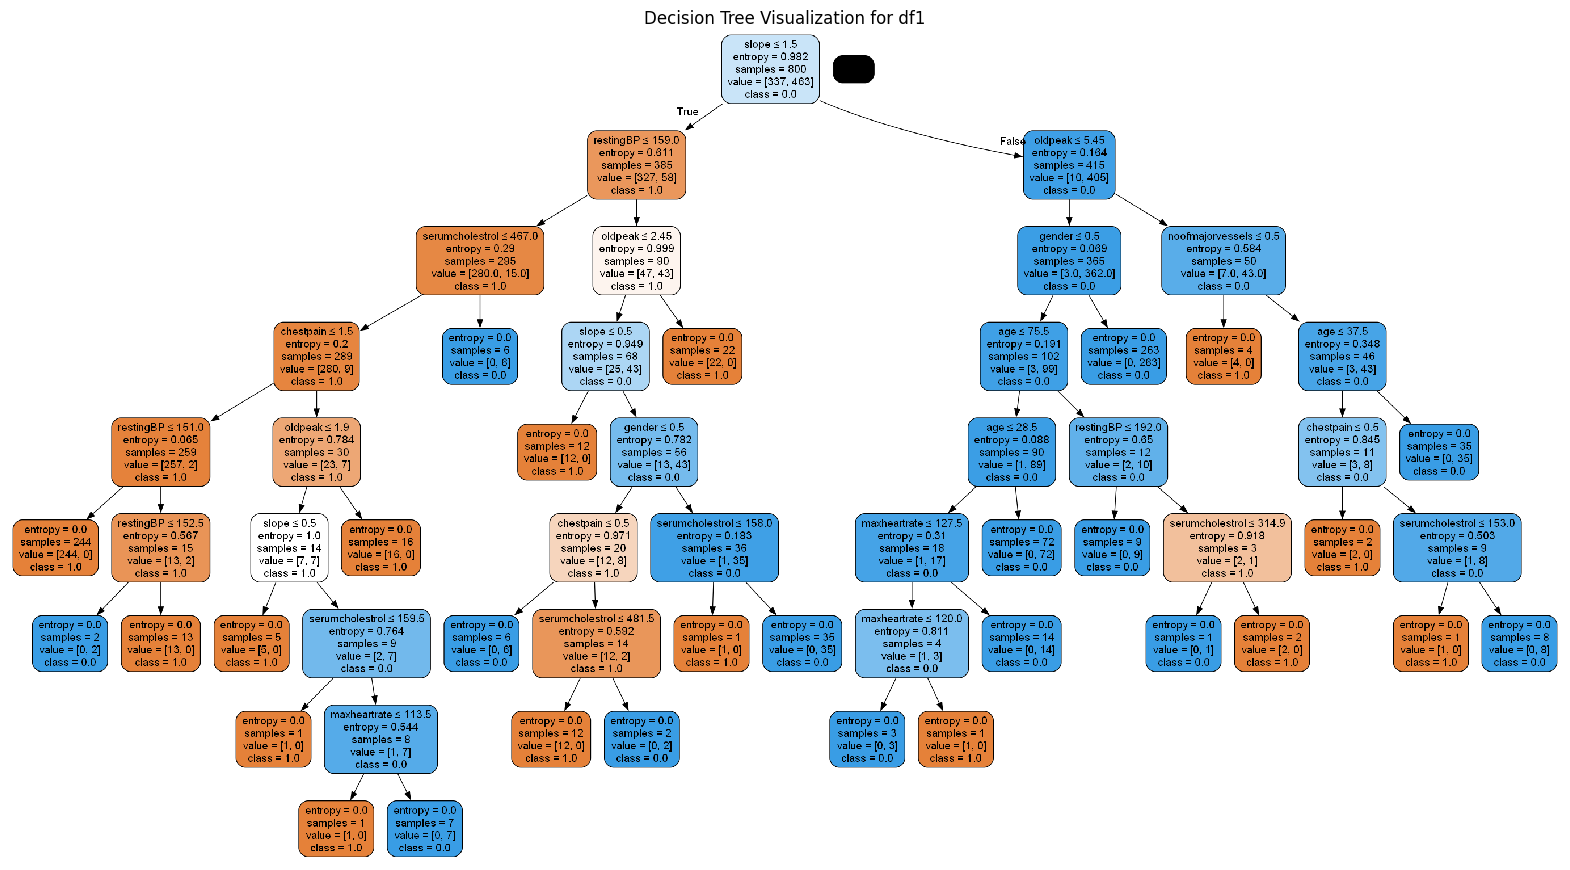

In [74]:
def evaluate_decision_tree(X, y, dataset_label):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the hyperparameter grid for  GridSearchCV
    param_grid = {'max_depth': range(3, 11),
                  'criterion': ['gini', 'entropy'] }

    # Initialize GridSearchCV with cross-validation and avg. precison score as the scoring metric
    grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring=make_scorer(average_precision_score), cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the best model
    best_params = grid_search.best_params_
    print(f'Optimal parameters: {best_params}')
    best_decisiontree = grid_search.best_estimator_

    # Get the predicted probabilities for the positive class
    y_scores = best_decisiontree.predict_proba(X_test)[:, 1]
    y_pred = best_decisiontree.predict(X_test)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()

    # Visualize the Decision Tree
    dot_data = StringIO()
    filename = f"{dataset_label}_tree.png"
    feature_names = X.columns
    target_names = y.unique().astype(str)

    export_graphviz(best_decisiontree, out_file=dot_data, 
                    feature_names=feature_names, 
                    class_names=target_names,
                    filled=True, rounded=True, 
                    special_characters=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png(filename)
    
    img = mpimg.imread(filename)
    plt.figure(figsize=(20, 20))
    plt.imshow(img, interpolation='nearest')
    plt.title(f'Decision Tree Visualization for {dataset_label}')
    plt.axis('off')
    plt.show()
    

# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_decision_tree(X, y, label)


# Random Forest

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        83
         1.0       0.98      0.98      0.98       117

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

PR AUC: 0.9991926083317283
Accuracy for df: 0.98


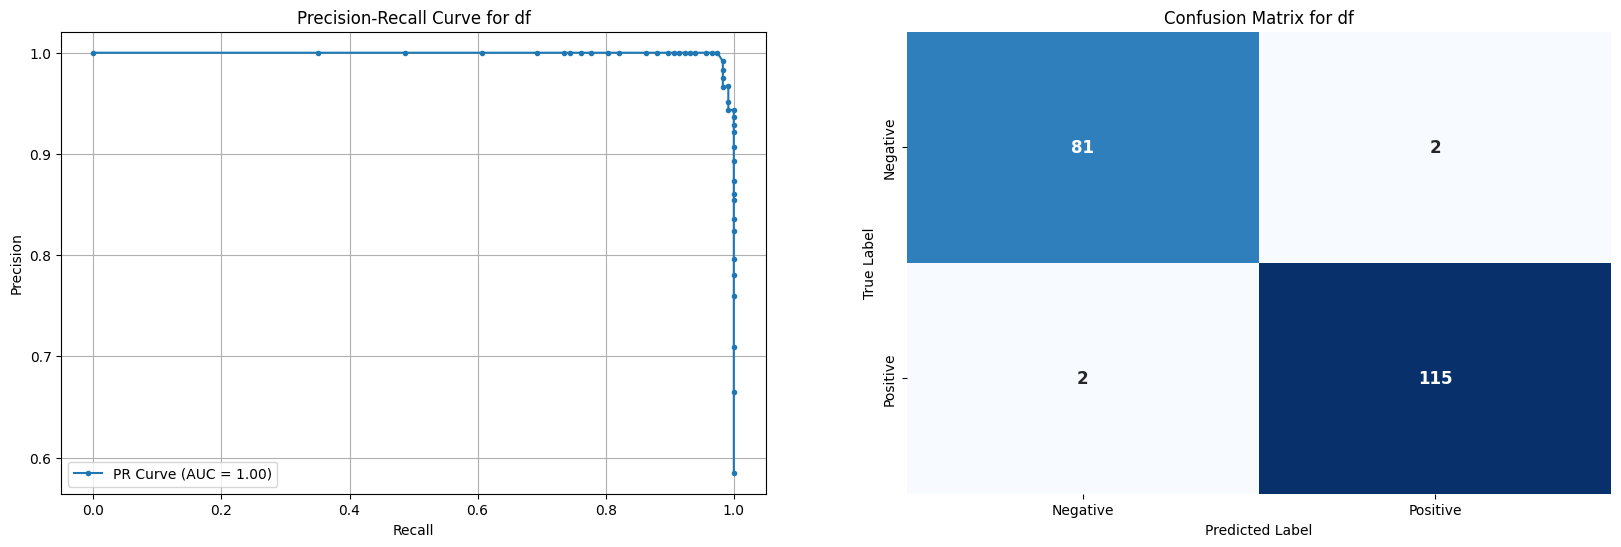

Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        83
         1.0       0.98      0.98      0.98       117

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

PR AUC: 0.9991926083317283
Accuracy for df1: 0.98


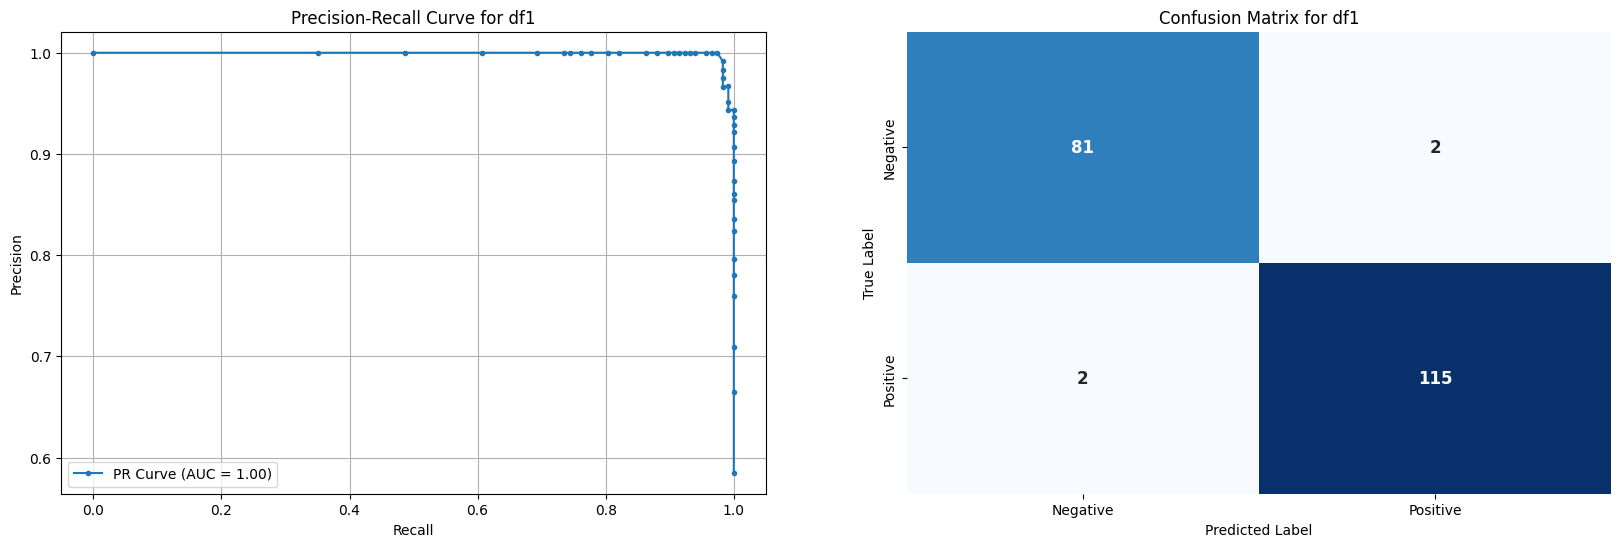

In [75]:
def evaluate_random_forest(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the RandomForest classifier
    random_forest = RandomForestClassifier(random_state=42)

    # Fit the classifier on the training data
    random_forest.fit(X_train, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = random_forest.predict_proba(X_test)[:, 1]
    y_pred = random_forest.predict(X_test)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()



# Dataset labels and data (assuming df, df1 are defined as before)
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}

for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_random_forest(X, y, label)


# SVM

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns


Best parameters found for df: {'kernel': 'poly'}
Classification Report for df: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        83
         1.0       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

PR AUC: 0.997244570293841
Accuracy for df: 0.97


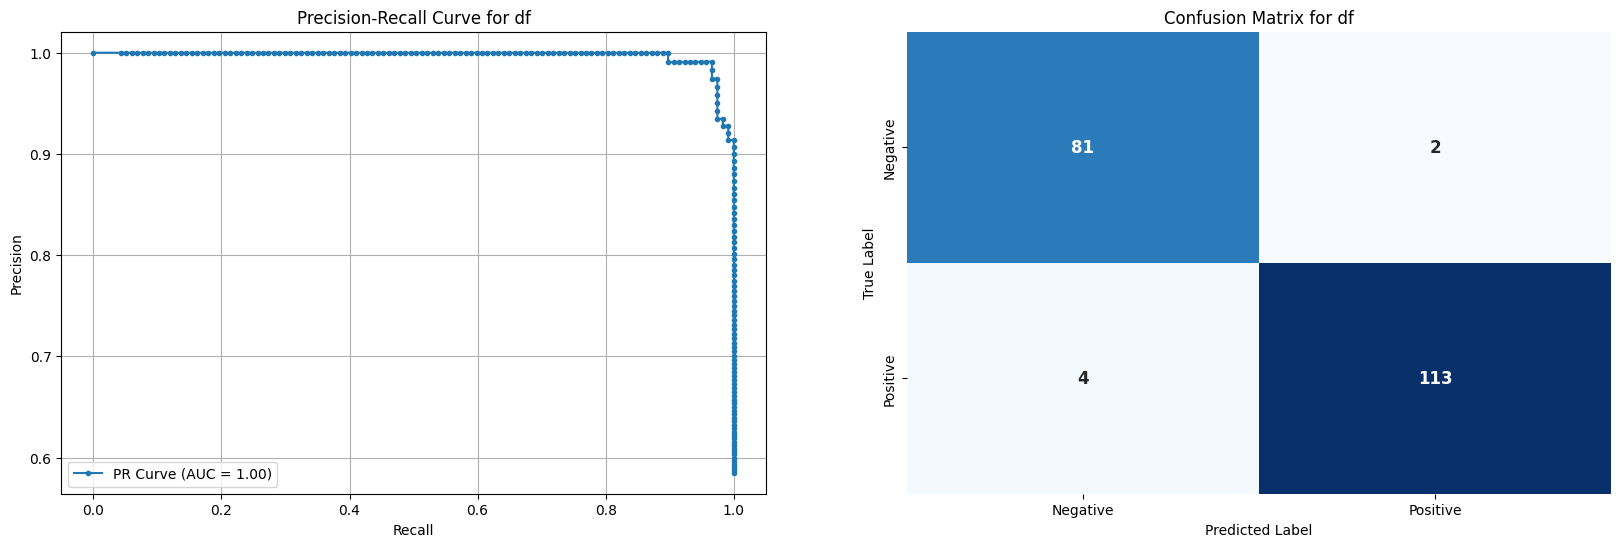

Best parameters found for df1: {'kernel': 'poly'}
Classification Report for df1: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        83
         1.0       0.98      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

PR AUC: 0.997244570293841
Accuracy for df1: 0.97


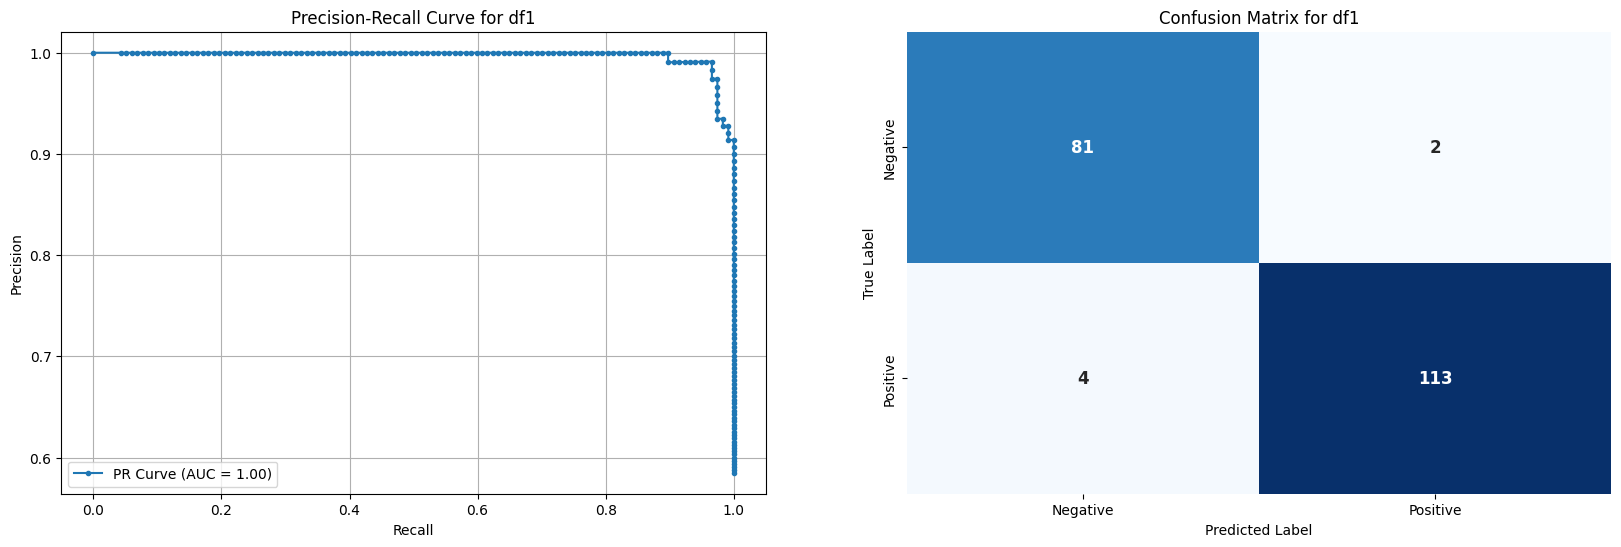

In [76]:

def evaluate_svm(X, y, dataset_label):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler and scale the training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Scale the test data using the same scaler
    X_test_scaled = scaler.transform(X_test)

    # Initialize the SVM classifier
    svm_clf = SVC(C = 1.0, probability=True)

    # Define the parameter grid for GridSearchCV
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }

    # Perform Grid Search to find the best parameters
    grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print(f'Best parameters found for {dataset_label}: {best_params}')

    # Use best parameters to train SVM
    best_svm_clf = SVC(**best_params, probability=True)
    best_svm_clf.fit(X_train_scaled, y_train)

    # Fit the classifier on the scaled training data
    best_svm_clf.fit(X_train_scaled, y_train)

    # Get the predicted probabilities for the positive class
    y_scores = best_svm_clf.predict_proba(X_test_scaled)[:, 1]
    y_pred = best_svm_clf.predict(X_test_scaled)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print(f'Classification Report for {dataset_label}: \n{class_report}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calculate precision and recall values
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)

    # Calculate the area under the PR curve
    pr_auc = auc(recall, precision)
    print(f'PR AUC: {pr_auc}')

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {dataset_label}: {accuracy:.2f}')

    # Create subplots for the PR curve and confusion matrix
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))

    # Plot the PR curve
    ax[0].plot(recall, precision, marker='.', label=f'PR Curve (AUC = {pr_auc:.2f})')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title(f'Precision-Recall Curve for {dataset_label}')
    ax[0].legend()
    ax[0].grid(True)

    # Plot confusion matrix
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": 12, "fontweight": "bold", "ha": "center", "va": "center"}, ax=ax[1])
    ax[1].set_title(f'Confusion Matrix for {dataset_label}')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')
    ax[1].set_xticks([0.5, 1.5])
    ax[1].set_xticklabels(['Negative', 'Positive'])
    ax[1].set_yticks([0.5, 1.5])
    ax[1].set_yticklabels(['Negative', 'Positive'])

    plt.show()


    
# Dataset labels and data
datasets = {
    'df': (df, 'target'),
    'df1': (df1, 'target')
}
# Iterate through each dataset, perform svm classification scaling, plot PR curve, ROC curve, and print metrics
for label, (df, target) in datasets.items():
    X = df.drop(columns=[target])
    y = df[target]
    evaluate_svm(X, y, label)
